# Project

## "CyberSecNet" Cyber Attack Classification and Clustering using different machine learning algorithm

### Miuhammad Taimoor P20-0603

### Ammar Naeem P20-

# Libraries

In [3]:
from google.colab import drive
import math
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/

### Importing all the required packages and loading csv files
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV #for fine tuning
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Data Set Reading

In [4]:
data = pd.read_csv('Dataset.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset.txt'

In [ ]:
data.head()

In [ ]:
# Check the dimensions of the dataset
print(data.shape)

In [ ]:
# Check the data types of the columns
print(data.dtypes)
# Or we can use print(dataset.info()) for getting full information

In [5]:
data.describe()

NameError: name 'data' is not defined

# Cleaning Data

In [286]:
data = data.drop_duplicates()

In [287]:
print(data)

        duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0      

In [288]:
# Read the Attack_types.txt file
data_attack = pd.read_csv('Attack_types.txt', header=None, names=['attack'])

# Create new DataFrame with 'Attack category' column
att_cat = data[['attack_category']].copy()

# Split the attack column into attack_type and attack_category columns
data_attack[['attack_type', 'attack_category']] = data_attack['attack'].str.split(' ', n=1, expand=True)

# Drop the original attack column
data_attack.drop('attack', axis=1, inplace=True)

# Print the resulting dataframe
data_attack.head()

,attack_type,attack_category
0,attack_category,attack_type
1,apache2,dos
2,back,dos
3,mailbomb,dos
4,processtable,dos


### Missing Values & Outliers

In [289]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [290]:
data = data.merge(data_attack, on='attack_category', how='left')
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,NaN
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,NaN
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,NaN
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,NaN
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,NaN


In [291]:
nulls =data.isnull().sum()

In [292]:
print(nulls , data.shape)

duration                            0
protocol_type                       0
service                             0
flag                                0
src_bytes                           0
dst_bytes                           0
land                                0
wrong_fragment                      0
urgent                              0
hot                                 0
num_failed_logins                   0
logged_in                           0
num_compromised                     0
root_shell                          0
su_attempted                        0
num_root                            0
num_file_creations                  0
num_shells                          0
num_access_files                    0
num_outbound_cmds                   0
is_host_login                       0
is_guest_login                      0
count                               0
srv_count                           0
serror_rate                         0
srv_serror_rate                     0
rerror_rate 

In [293]:
# replace all null values with "normal"
data['attack_type'] = data['attack_type'].replace(np.nan,'normal')

In [294]:
data['attack_type'].value_counts()

normal    125973
Name: attack_type, dtype: int64

In [295]:
# checking null values again after replacing them with "normal"
nulls =data.isnull().sum()
print(nulls , data.shape)

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [296]:
# dropping attack category column because it is no longer needed
data.drop('attack_category' ,axis = 1, inplace=True)

In [297]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,normal
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [298]:
#checking duplicate values
duplicate_rows_df = data[data.duplicated()]
print("# of duplicate rows: ", duplicate_rows_df)

# of duplicate rows:          duration protocol_type service flag  src_bytes  dst_bytes  land  \
26923          0          icmp   eco_i   SF          8          0     0   
34008          0          icmp   eco_i   SF          8          0     0   
79815          0          icmp   eco_i   SF          8          0     0   
79859          0          icmp   ecr_i   SF          8          0     0   
106599         0          icmp   ecr_i   SF          8          0     0   
113236         0          icmp   ecr_i   SF          8          0     0   
120163         0          icmp   ecr_i   SF          8          0     0   
120273         0          icmp   ecr_i   SF          8          0     0   
123791         0          icmp   eco_i   SF          8          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
26923                0       0    0  ...                     1.0   
34008                0       0    0  ...                     1.0   
79815                0 

In [299]:
#removing duplicate values
data = data.drop_duplicates()

In [300]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate,
occurence,
attack_type"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

44


In [301]:
#Standardize
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
categories = ['service','protocol_type','flag']
for category in categories:
# Using .fit_transform function to fit label
# encoder and return encoded label
    label = le.fit_transform(data[category])
    data.drop(category,axis=1)
    data[category] = label
 
 #printing label
    print(label)
data.head()

[20 44 49 ... 54 30 20]
[1 2 1 ... 1 1 1]
[9 9 5 ... 9 5 9]


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,attack_type
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,normal
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [302]:
#standardize it now
from sklearn import preprocessing
standard = preprocessing.scale(x)
standardized_x = pd.DataFrame(standard, columns= x.columns)
print(standardized_x)

        duration  protocol_type   service      flag  src_bytes  dst_bytes  \
0      -0.110253      -0.124905 -0.686859  0.751153  -0.007679  -0.004919   
1      -0.110253       2.219539  0.781356  0.751153  -0.007738  -0.004919   
2      -0.110253      -0.124905  1.087234 -0.736170  -0.007763  -0.004919   
3      -0.110253      -0.124905 -0.442157  0.751153  -0.007723  -0.002891   
4      -0.110253      -0.124905 -0.442157  0.751153  -0.007729  -0.004814   
...          ...            ...       ...       ...        ...        ...   
125959 -0.110253      -0.124905  1.087234 -0.736170  -0.007763  -0.004919   
125960 -0.107182       2.219539  1.087234  0.751153  -0.007745  -0.004883   
125961 -0.110253      -0.124905  1.393112  0.751153  -0.007382  -0.004823   
125962 -0.110253      -0.124905 -0.075103 -0.736170  -0.007763  -0.004919   
125963 -0.110253      -0.124905 -0.686859  0.751153  -0.007737  -0.004919   

            land  wrong_fragment    urgent       hot  ...  dst_host_srv_cou

In [303]:
x = data.drop('attack_type',axis=1)
y = data['attack_type']

### CATEGORICAL FEATURES DISTRIBUTION

In [305]:
#Visualization
def bar_graph(feature):
    data[feature].value_counts().plot(kind="bar")

In [306]:
def bar_graph2(feature):
    data_attack[feature].value_counts().plot(kind="bar")

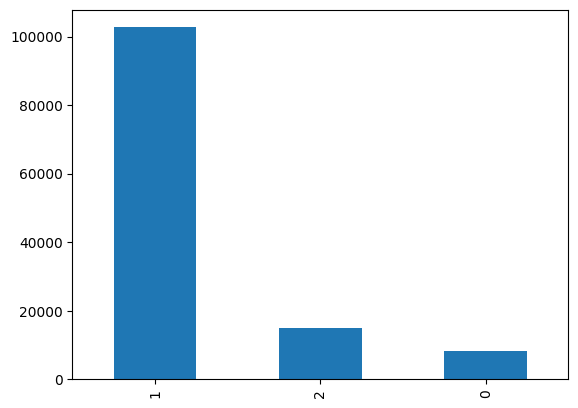

In [307]:
bar_graph('protocol_type')

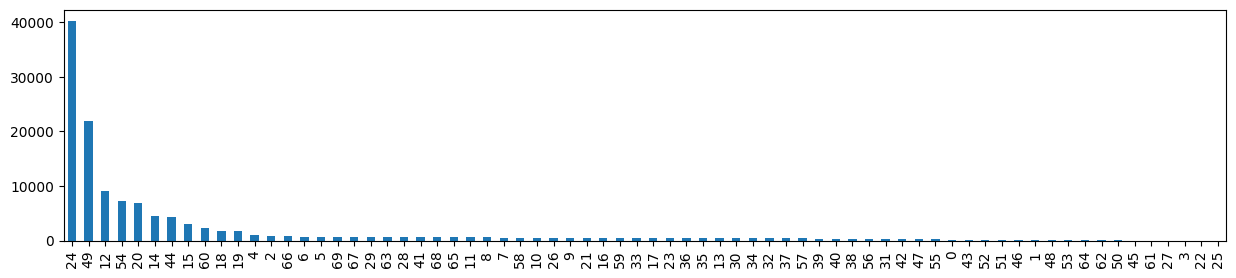

In [308]:
mp.figure(figsize=(15,3))
bar_graph('service')

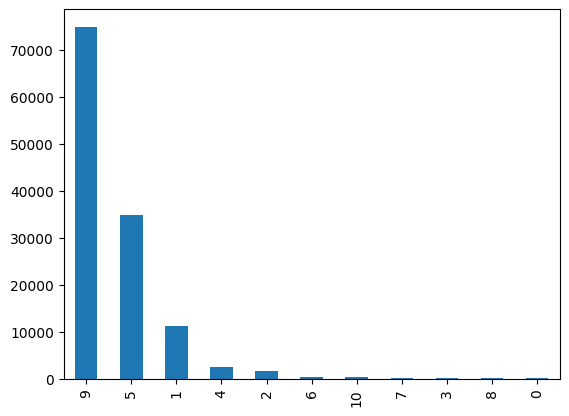

In [309]:
bar_graph('flag')

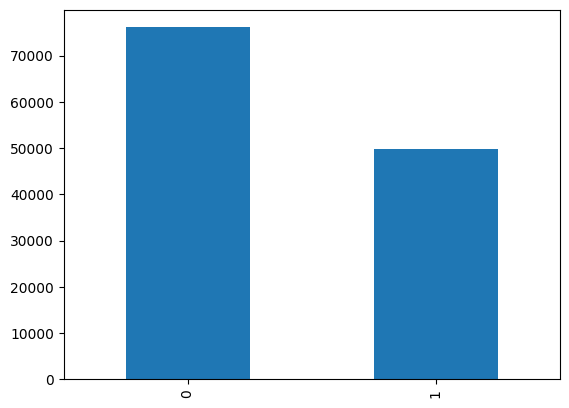

In [310]:
bar_graph('logged_in')

In [312]:
#bar_graph('attack_category') ----------- working fine in jupyter but not in google colab

KeyError: ignored

### DATA CORRELATION

<ipython-input-313-473be11efb05>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data= data.dropna('columns')# drop columns with NaN


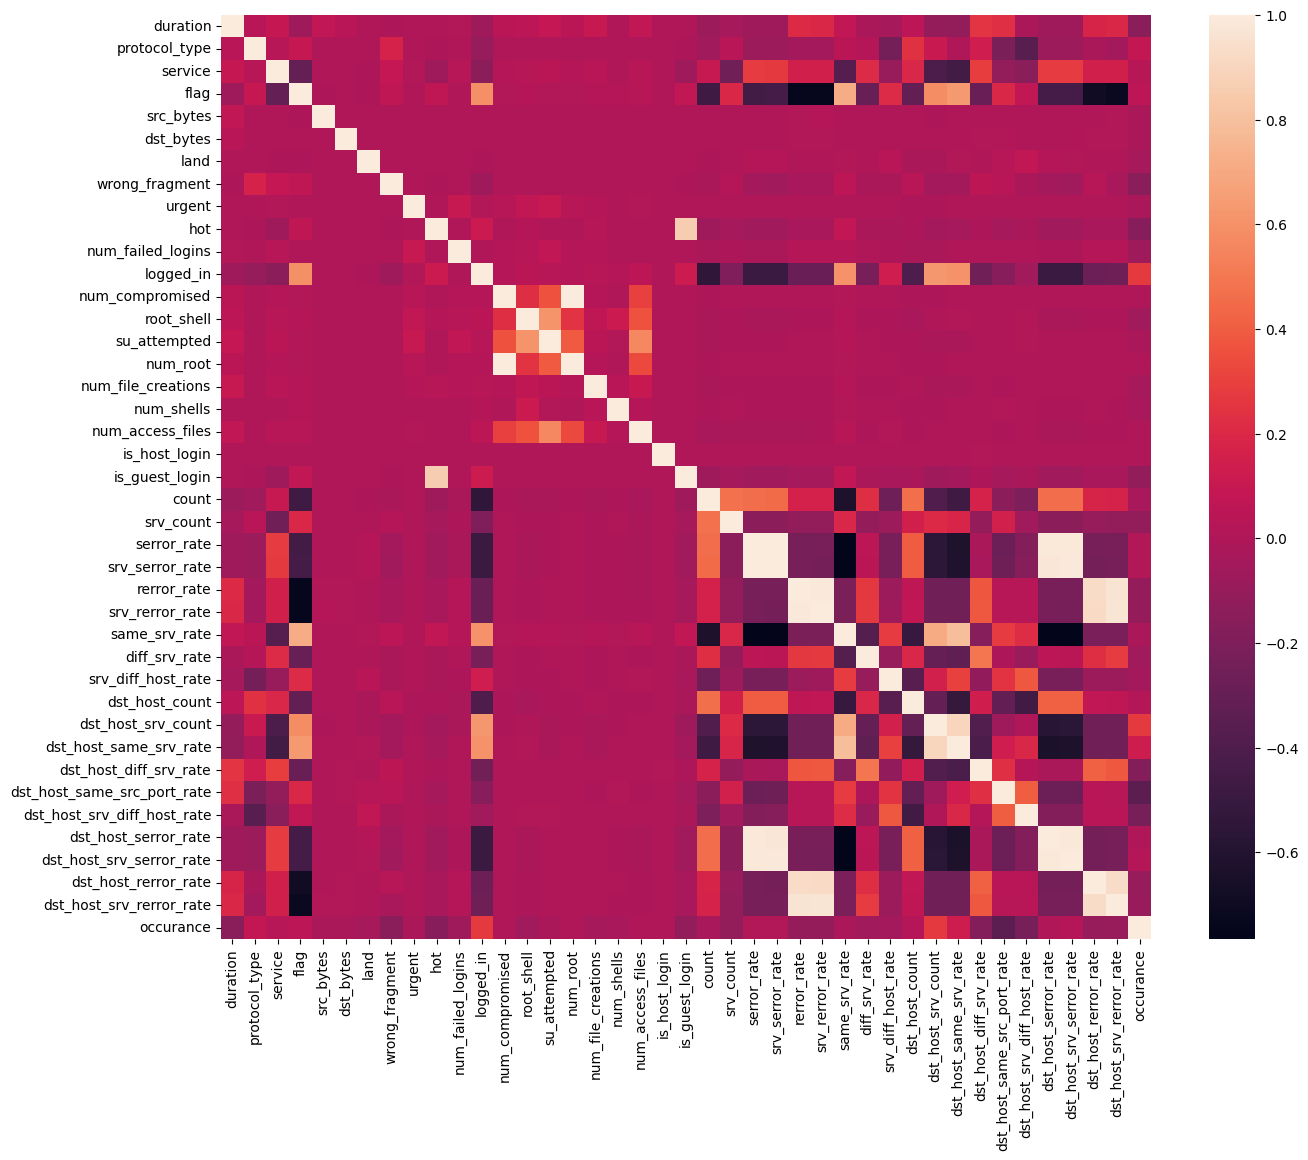

In [313]:
data= data.dropna('columns')# drop columns with NaN

data = data[[col for col in data if data[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr_matrix = data.corr()

mp.figure(figsize=(15,12))

sns.heatmap(corr_matrix)

mp.show()

In [314]:
#The below variables are highly correlated with num_compromised and should be ignored for analysis.
data.drop('num_root',axis = 1,inplace = True)

data.drop('srv_serror_rate',axis = 1,inplace = True)

data.drop('srv_rerror_rate',axis = 1, inplace=True)

data.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

data.drop('dst_host_serror_rate',axis = 1, inplace=True)

data.drop('dst_host_rerror_rate',axis = 1, inplace=True)

data.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

data.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [315]:
data.shape

(125964, 33)

In [316]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'occurance'],
      dtype='object')

In [317]:
data_std = data.std()
data_std = data_std.sort_values(ascending = True)
data_std

is_host_login                  2.817583e-03
land                           1.408657e-02
urgent                         1.436654e-02
num_shells                     2.218192e-02
root_shell                     3.660415e-02
su_attempted                   4.515600e-02
num_failed_logins              4.524075e-02
is_guest_login                 9.661575e-02
num_access_files               9.937310e-02
dst_host_srv_diff_host_rate    1.125675e-01
diff_srv_rate                  1.803201e-01
dst_host_diff_srv_rate         1.889272e-01
wrong_fragment                 2.535390e-01
srv_diff_host_rate             2.598016e-01
dst_host_same_src_port_rate    3.089243e-01
rerror_rate                    3.204454e-01
protocol_type                  4.265419e-01
same_srv_rate                  4.396292e-01
serror_rate                    4.464651e-01
num_file_creations             4.839523e-01
logged_in                      4.890161e-01
hot                            2.150045e+00
occurance                      2

FEATURE MAPPING

In [318]:
data['protocol_type'].value_counts()

1    102689
2     14993
0      8282
Name: protocol_type, dtype: int64

In [319]:
#protocol_type feature mapping
pmap = {'tcp':0,'udp':1,'icmp':2}
data['protocol_type'] = data['protocol_type'].map(pmap)

In [320]:
data['flag'].value_counts()

9     74936
5     34851
1     11233
4      2421
2      1562
6       365
10      271
7       127
3       103
8        49
0        46
Name: flag, dtype: int64

In [321]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'S1':5 ,'SH':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
data['flag'] = data['flag'].map(fmap)

In [322]:
data.drop('service',axis = 1,inplace= True)

In [323]:
data.shape

(125964, 32)

In [324]:
data.dtypes

duration                         int64
protocol_type                  float64
flag                           float64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate       

### MODELLING

In [325]:

X_train, X_test, y_train, y_test =train_test_split(standardized_x,y,test_size=0.3,random_state =0)
X_train.shape, X_test.shape

((88174, 42), (37790, 42))

In [326]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

    

In [327]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

9

In [328]:
corr_features

{'dst_host_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'is_guest_login',
 'num_root',
 'srv_rerror_rate',
 'srv_serror_rate'}

In [329]:
Xtrnew = X_train.drop(corr_features,axis=1)
Xtestnew = X_test.drop(corr_features,axis=1)

In [330]:
Xtrnew.shape

(88174, 33)

In [331]:
Xtestnew.shape

(37790, 33)

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# DECISION TREE

In [335]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [336]:
model2 = DecisionTreeClassifier(criterion= 'entropy', max_depth=4, random_state=10)
model2.fit(Xtrnew, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [337]:
model2.score(Xtrnew , y_train)

1.0

In [338]:
model2 =DecisionTreeClassifier(criterion= 'entropy', max_depth=4, random_state=10)
model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [339]:
model2.score(X_train , y_train)

1.0

In [340]:
model2 =DecisionTreeClassifier(criterion= 'gini', max_depth=4, random_state=10)
model2.fit(Xtrnew, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [341]:
model2.score(Xtrnew , y_train)

1.0

# Artificial Neural Network

In [342]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [343]:
#Build an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

In [344]:
#Train the MLP classifier on the training data
mlp.fit(Xtrnew, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [345]:
#Make predictions on the test data
y_pred = mlp.predict(Xtestnew)

In [346]:
#Fine-tune the MLP classifier by adding another hidden layer with 50 neurons
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

In [347]:
#Train the fine-tuned MLP classifier on the training data
mlp_finetuned = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=500, activation='relu', solver='adam', random_state=42)
mlp_finetuned.fit(Xtrnew, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=500, random_state=42)

In [348]:
#Evaluate the performance of the fine-tuned MLP classifier on the test data
y_pred_finetuned = mlp_finetuned.predict(Xtestnew)
print("Accuracy (fine-tuned MLP):", accuracy_score(y_test, y_pred_finetuned))
print("Precision (fine-tuned MLP):", precision_score(y_test, y_pred_finetuned, average='weighted'))
print("Recall (fine-tuned MLP):", recall_score(y_test, y_pred_finetuned, average='weighted'))
print("F1-score (fine-tuned MLP):", f1_score(y_test, y_pred_finetuned, average='weighted'))

Accuracy (fine-tuned MLP): 1.0
Precision (fine-tuned MLP): 1.0
Recall (fine-tuned MLP): 1.0
F1-score (fine-tuned MLP): 1.0


# KNN

In [349]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn2 = KNeighborsClassifier(n_neighbors=2)
knn4 = KNeighborsClassifier(n_neighbors=4)
knn2.fit(Xtrnew, y_train)
y_pred_2 = knn2.predict(Xtestnew)
knn4.fit(Xtrnew, y_train)
y_pred_4 = knn4.predict(Xtestnew)

print("Accuracy with k=2", accuracy_score(y_test, y_pred_2)*100)
print("Accuracy with k=4", accuracy_score(y_test, y_pred_4)*100)


Accuracy with k=2 100.0
Accuracy with k=4 100.0


In [350]:
# now if we don't remove those features
knnact = KNeighborsClassifier(n_neighbors=3)
knnact.fit(X_train, y_train)
y_predict_act = knnact.predict(X_test)
print("Accuracy with k=2", accuracy_score(y_test, y_predict_act)*100)

Accuracy with k=2 100.0


In [351]:
# Determine the optimal value of k
best_k = 0
best_accuracy = 0
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best k: {}".format(best_k))

Best k: 1


In [352]:
# Train the model with the optimal value of k
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [353]:
# Predict the attack categories for the testing data
y_pred = model.predict(X_test)

In [354]:
# Evaluate the performance of the model using accuracy, precision, recall, and F1 score metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
